In [1]:
from sklearn.datasets  import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris= load_iris()
X, y= iris.data, iris.target

C= KNeighborsClassifier()



## k-nearest neighbors algorithm

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

![](https://goo.gl/Br5fke)

-   Example of k-NN classification. 
-   The test sample (green circle) should be classified 
-   either to the first class of blue squares 
-   or to the second class of red triangles. 

-   If k = 3 (solid line circle) it is assigned to the second class 
-   because there are 2 triangles and only 1 square inside the inner circle. 

-   If k = 5 (dashed line circle) it is assigned to the first class 
-   (3 squares vs. 2 triangles inside the outer circle).

已知 data 分為 藍色四邊形(第一類) 與 紅色三角形(第二類)，
每個data 有二維座標(x,y) 故可畫在平面上，散佈如上。
今有未知 綠色data，其亦有 二維座標(x,y)。

如何決定其所屬類別？
1. 以未知點為中心，尋找最近之 k 點已知類別的 data，
2. 由 它們投票，取最多數決定所屬類別。

以上例而言，
- 若 k==1， 則 判定 未知點屬於 紅色三角形
- 若 k==3， 則 判定 未知點屬於 紅色三角形
- 若 k==5， 則 判定 未知點屬於 藍色四邊形

In [34]:
C
# n_neighbors=5 可更動，最簡單的情形是 n_neighbors == 1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
X, y, C  # data, label, classifier

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
        [ 4.7,

In [32]:
# 設定分類器
C= KNeighborsClassifier(n_neighbors=1)

# 訓練
C.fit(X, y)

# 辨識
C.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
# 看正確率
C.predict(X)==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## 以上，就做出一個最簡單的分類器了， pattern recognition 的核心全貌便已浮現。


一般而言，我們會把 資料分為 訓練集 與 測試集，
分別用來 訓練與測試所設計的分類器。

用來測試的資料不能出現於訓練集中，
否則便算是作弊！
所做的分類器之辨識率就不足採信。

簡單的把資料分為偶數集(序號從0開始，間格為2)、奇數集(序號從1開始，間格為2)如下：
偶數集當訓練集，奇數集當測試集。


In [43]:
X0= X[0::2]; X1= X[1::2]
y0= y[0::2]; y1= y[1::2]

In [48]:
# 訓練
C.fit(X0, y0)

# 辨識 訓練集 (inside test)
z0= C.predict(X0)

# 辨識 測試集 (outside test)
z1= C.predict(X1)

z0, z1

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2]))

In [52]:
# 辨識率 inside; (幾乎) 百分百 正確 (其實也沒有保證)
z0==y0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [53]:
# 辨識率 outside; 有一些錯誤。 (有錯是正常，如何降低錯誤率則是整個 pattern recognition 研究的重心！)
z1==y1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

一般而言，如何分割 data 成 訓練集 與 測試集，也有一些常見的經驗法則， scikit learn 提供了以下的方法：


In [65]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y= train_test_split(X, y, 
                                                   train_size=  0.5, 
                                                   random_state=123, 
                                                   stratify= y)
print("Labels for training and testing data")
print(train_y)
print(test_y)
'''
[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]
'''
# 靠著 random_state=123 可把 randomize 的情形固定下來，寫程式過程中有一些助益！
# 靠著 stratify= y 可讓 類別分布 均勻，有助於辨識器的辨識效能。

Labels for training and testing data
[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]


'\n[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1\n 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2\n 2]\n[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2\n 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0\n 2]\n'

In [69]:
import numpy as np
np.bincount(train_y)

array([25, 25, 25], dtype=int64)

In [71]:
# 訓練
C.fit(train_X, train_y)

# 辨識 訓練集 (inside test)
train_z= C.predict(train_X)

# 辨識 測試集 (outside test)
test_z= C.predict(test_X)

train_z, test_z

(array([1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2,
        1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
        0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2,
        1, 0, 1, 0, 0, 1]),
 array([0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
        1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2,
        0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2,
        0, 2, 1, 0, 0, 1]))

In [72]:
train_z==train_y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [75]:
test_z==test_y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

# 計算錯誤率

In [88]:
list(train_z==train_y).count(False)/len(train_z)

0.0

In [89]:
list(test_z==test_y).count(False)/len(test_z)

0.06666666666666667

# 從頭來過，改變分類器的參數。
看看有沒有可能提升辨識效能，降低錯誤率！

In [102]:
# 設定分類器
C= KNeighborsClassifier(n_neighbors= 2) # n_neighbors= 1 -->2 -->3

# 訓練
C.fit(train_X, train_y)

# 辨識 訓練集 (inside test)
train_z= C.predict(train_X)

# 辨識 測試集 (outside test)
test_z= C.predict(test_X)

# 計算錯誤率
err0= list(train_z==train_y).count(False)/len(train_z)
err1= list(test_z==test_y).count(False)/len(test_z)

print('err0= {}, err1= {}'.format(err0,err1))

err0= 0.013333333333333334, err1= 0.04


In [105]:
aL= []
for k in range(1,10):
    # 設定分類器
    C= KNeighborsClassifier(n_neighbors= k) # n_neighbors= 1 -->2 -->3

    # 訓練
    C.fit(train_X, train_y)

    # 辨識 訓練集 (inside test)
    train_z= C.predict(train_X)

    # 辨識 測試集 (outside test)
    test_z= C.predict(test_X)

    # 計算錯誤率
    err0= list(train_z==train_y).count(False)/len(train_z)
    err1= list(test_z==test_y).count(False)/len(test_z)

    print('k={}, err0= {}, err1= {}'.format(k, err0, err1))
    
    # 把實驗數據存起來，進一步做分析。
    aL += [(k, err0, err1)]
    

k=1, err0= 0.0, err1= 0.06666666666666667
k=2, err0= 0.013333333333333334, err1= 0.04
k=3, err0= 0.013333333333333334, err1= 0.05333333333333334
k=4, err0= 0.013333333333333334, err1= 0.02666666666666667
k=5, err0= 0.013333333333333334, err1= 0.04
k=6, err0= 0.02666666666666667, err1= 0.013333333333333334
k=7, err0= 0.013333333333333334, err1= 0.04
k=8, err0= 0.013333333333333334, err1= 0.013333333333333334
k=9, err0= 0.04, err1= 0.02666666666666667


In [106]:
aL


[(1, 0.0, 0.06666666666666667),
 (2, 0.013333333333333334, 0.04),
 (3, 0.013333333333333334, 0.05333333333333334),
 (4, 0.013333333333333334, 0.02666666666666667),
 (5, 0.013333333333333334, 0.04),
 (6, 0.02666666666666667, 0.013333333333333334),
 (7, 0.013333333333333334, 0.04),
 (8, 0.013333333333333334, 0.013333333333333334),
 (9, 0.04, 0.02666666666666667)]

# 作圖觀察 k 與 錯誤率 的 關係

Populating the interactive namespace from numpy and matplotlib


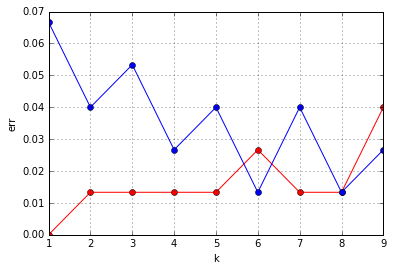

In [153]:
%pylab inline
import pylab as pl

# 作圖觀察 k 與 錯誤率 的 關係

A= np.array(aL)

pl.plot(A[:,0], A[:,1], c='r', marker='o')
pl.plot(A[:,0], A[:,2], c='b', marker='o')

pl.xlabel('k')
pl.ylabel('err')
pl.grid('on')

#pl.show()

